In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
df=pd.read_csv('./puestos-sector-trim.csv', index_col=0, parse_dates=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 38 entries, 2006-01-01 to 2015-04-01
Data columns (total 27 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   total_sistema                                                 38 non-null     float64
 1   total_sectores_productores_bienes                             38 non-null     float64
 2   agricultura_ganaderia_caza_silvicultura                       38 non-null     float64
 3   pesca_servicios_conexos                                       38 non-null     float64
 4   explotacion_minas_canteras                                    38 non-null     float64
 5   total_industria_manufacturera                                 38 non-null     float64
 6   alimentos_bebidas_tabaco                                      38 non-null     float64
 7   textiles_cuero                                       

Los períodos completos son del 2007 al 2014 inclusive, por lo tanto se trabajará con ese segmento de tiempo para comparar por año.

In [28]:
ddf=df[(df.index>pd.Timestamp(year=2007, month=1, day=1))&(df.index<pd.Timestamp(year=2015, month=1, day=1))]
dfY=ddf['total_sistema'].resample('Y').sum()
dfY

indice_tiempo
2007-12-31    20093.963
2008-12-31    28331.015
2009-12-31    28266.288
2010-12-31    29110.907
2011-12-31    30561.338
2012-12-31    31134.605
2013-12-31    31599.475
2014-12-31    31861.552
Freq: A-DEC, Name: total_sistema, dtype: float64

Un gráfico de la evolución del empleo entre 2008 y 2015 inclusive

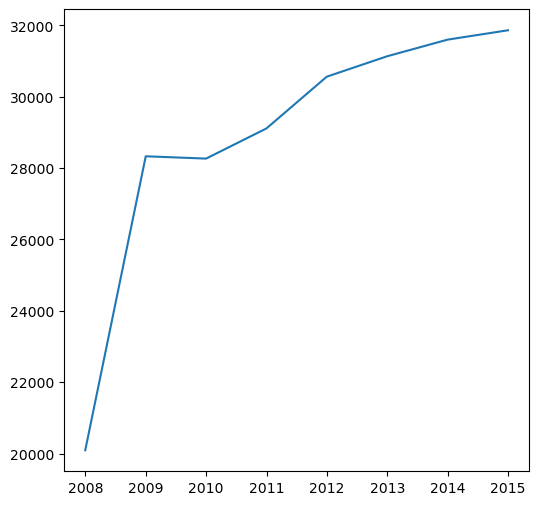

In [29]:
fig, ax= plt.subplots(figsize=(6,6))
ax.plot(dfY)
plt.show()


### Markers
https://matplotlib.org/devdocs/api/markers_api.html
Los Markers son marcas que nos permiten identificar los punto que serán las mediciones representadas en el gráfico, los argumentos pueden ser:
* marker, el tipo de marcador.
* markerfacecolor, color de la marca puede ser hexagesimal
* markersize, el tamaño
* markeredgecolor, contorno
* fillstyle, estilo (full, top, buttom, left, right, none)
* markerfacecoloralt, color del resto del marcador
* ...

No todos los marcadores tienen la misma posibilidad de edición, en la documentación hay una lista de los que pueden editarse.<br>
https://matplotlib.org/devdocs/gallery/lines_bars_and_markers/marker_reference.html

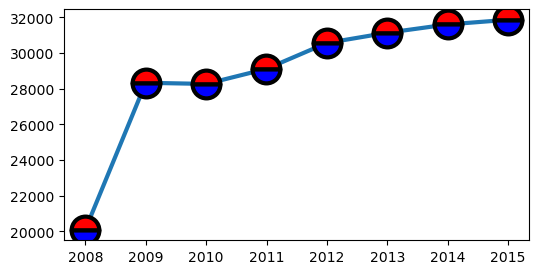

In [73]:
fig, ax= plt.subplots(figsize=(6,3))
ax.plot(dfY, marker="o", linewidth=3, markerfacecolor="#FF0000", markersize=20, markeredgecolor="k", fillstyle="top", markerfacecoloralt="blue", markeredgewidth=3)
plt.show()


Estos marcadores se usan en los diagramas plots, scatters

**Marcadores literales o TeX:**
* literal, se coloca entre "$" el texto que puestra el marcador
* TeX, luego del primer "$" se coloca "\" y el nombre, TeX es una colección de simbolos matemáticos

In [65]:
dfT=ddf.loc[pd.Timestamp(year=2007, month=1, day=1):pd.Timestamp(year=2015, month=1, day=1),('total_sistema','total_sectores_productores_bienes')].resample('Y').sum()
dfT

,total_sistema,total_sectores_productores_bienes
indice_tiempo,,
2007-12-31,20093.963,5941.955
2008-12-31,28331.015,8216.243
2009-12-31,28266.288,7917.338
2010-12-31,29110.907,7994.732
2011-12-31,30561.338,8409.108
2012-12-31,31134.605,8416.142
2013-12-31,31599.475,8451.928
2014-12-31,31861.552,8410.298


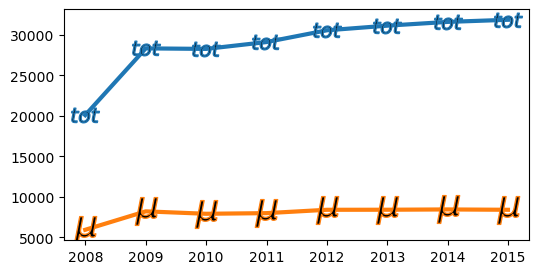

In [72]:
fig, ax= plt.subplots(figsize=(6,3))
ax.plot(dfT['total_sistema'], marker="$tot$", linewidth=3, markersize=20, markerfacecolor="k")
ax.plot(dfT['total_sectores_productores_bienes'], marker="$\mu$", linewidth=3, markersize=20, markerfacecolor="k")
plt.show()

### Textos, Anotaciones, Leyebdas

##### Textos
https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.text.html<br>
* El texto debe contener la ubicación en x y en y, en este caso al ser fechas las de x, debe definirse como timestamp.
* s (String), lleva entre comilla el texto
* fontsize, Tamaño
* color, color que puede ser nombre o hexagecimal
* bbox, describe el marco (es optativo) [+ Opciones]("https://matplotlib.org/stable/_images/sphx_glr_fancybox_demo_001.png)
* ...

##### Anotaciones
* Se ingresa el texto de la anotación
* Tupla con las coordenadas que se desea marcar
* Ubicación del texto con xytext
* Tamaño del texto
* Definición de flecha para vincular al punto que describe la anotación
    * arrowstyle define el estilo de flecha  [+ Opciones]("https://matplotlib.org/stable/_images/sphx_glr_fancyarrow_demo_001.png)
    * width, ancho
    * headlength, largo de punta
    * headwidth, ancho de punta
    * shrink, distancia al texto
* [+ Opciones](https://matplotlib.org/stable/users/explain/text/annotations.html#annotating-with-arrows)

##### Leyendas
* En cada serie se coloca el argumento "label" y todas las definiciones de las líneas como "*linestyle*" serán tomadas para la leyenda
* Se llama al método legend() para ax
* Editar opciones:
    * loc, ubicación

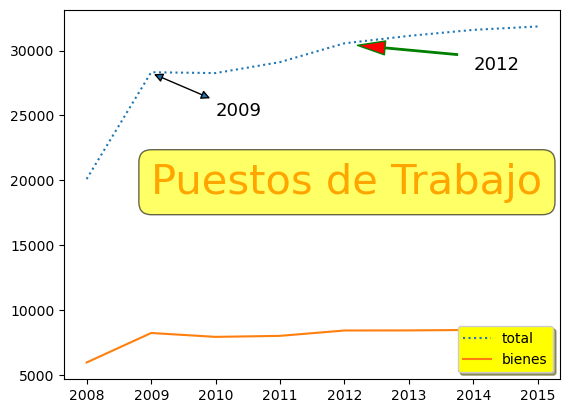

In [169]:
fig, ax= plt.subplots()
ax.plot(dfT['total_sistema'], linestyle=":", label="total")
ax.plot(dfT['total_sectores_productores_bienes'], label="bienes")
ax.text(x=pd.Timestamp('2009/01/01') ,y=19000 ,s="Puestos de Trabajo",fontsize=30,color="orange", bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.6))
ax.annotate('2009',(pd.Timestamp('2009-01-01'),28266), xytext=((pd.Timestamp('2009-12-31'),25000)), fontsize=13, arrowprops=dict(arrowstyle="<|-|>"))
ax.annotate('2012',(pd.Timestamp('2012-01-01'),30500), xytext=((pd.Timestamp('2013-12-31'),28500)), fontsize=13, arrowprops=dict(width=1, headlength=20, headwidth=10, shrink=0.1, facecolor='red', edgecolor='green'))
ax.legend(loc='lower right', facecolor='yellow', shadow=True)
plt.show()

### Escalas

* Determinar la progresioń de la escala tanto de y como de x con .set_yscale o .set_xscale
* Los valores dentro de los que se comprende la escala con .set_ylim y .set_xlim
* Definición de las marcas de la escala .set_xticks o .set_yticks

In [170]:
import numpy as np

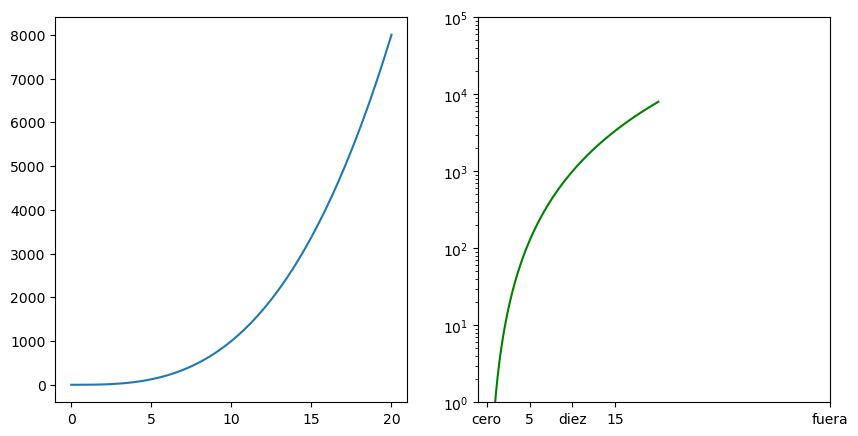

In [244]:
x=np.linspace(0,20,200)
y=x**3
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].plot(x,y)
ax[1].plot(x,y, color='green')
ax[1].set_yscale('log')
ax[1].set_ylim(1,100000)
ax[1].set_xticks((0,5,10,15,40),('cero',5,'diez',15,"fuera"))
plt.show()

### Ticks
Son las marcas de los ejes, existen los mayores y los menores

In [208]:
ventas={
    'meses':['enero','febrero','marzo','abril','mayo','junio'],
    'venta':[100,150,250,200,330,300]
}
vt=pd.DataFrame(ventas)
vt

,meses,venta
0,enero,100
1,febrero,150
2,marzo,250
3,abril,200
4,mayo,330
5,junio,300


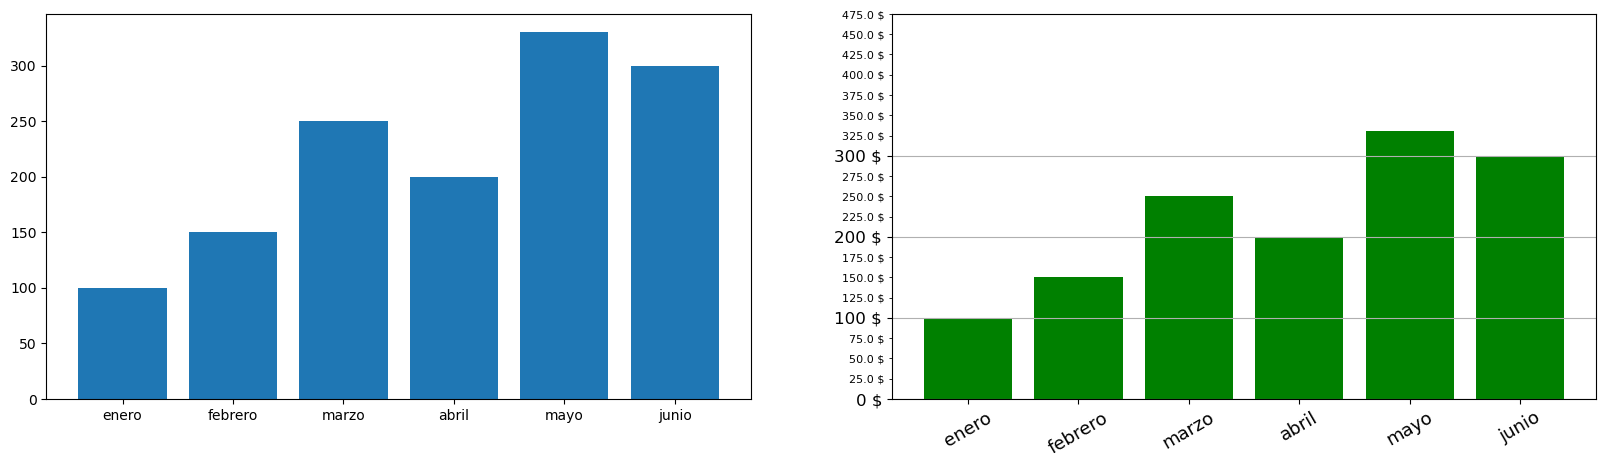

In [245]:
fig, ax = plt.subplots (1,2, figsize=(20,5))
ax[0].bar(vt['meses'],vt['venta'])
ax[1].bar(vt['meses'],vt['venta'], color='green')
# Define rango de los Ticks mayores
ax[1].set_yticks(range(0,400,100))
# Define rango de los Ticks menores (minor=True)
ax[1].set_yticks(range(0,500,25), minor=True)
# Fromato de cada Ticks, 'x:' es obligatorio, seguido del espacio de margen, '.' cantidad de decimales, y 'f' es de notación , se puede usar 'e', 'n', o 'g' para notaciones científicas.
ax[1].yaxis.set_major_formatter('{x:.0f} $')
ax[1].yaxis.set_minor_formatter('{x:.1f} $')
# Tamaño de las fuentes de cada Tick
ax[1].tick_params(axis='y', which='major', labelsize='12')
ax[1].tick_params(axis='y', which='minor', labelsize='8')
# Cambio rotación y tamaño del texto de las etiquetas del eje x
ax[1].tick_params(axis='x', labelsize='13', labelrotation=30)
# Grid de los ticks mayores para 'y'
ax[1].grid(axis='y')
plt.show()